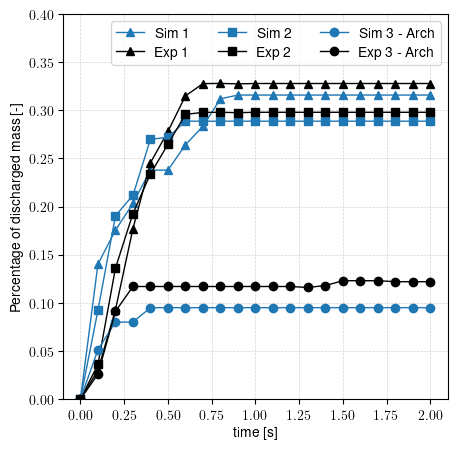

In [8]:
import os
import math
import scipy.special as sc
import numpy as np
import matplotlib.pyplot as plt
import cv2

plt.rcParams.update( { "text.usetex": True, "font.family": "Helvetica" } )

time = np.linspace(0, 2, num = 21, endpoint = True)
## B = 60 mm
exp1 = np.array( [0, 0.03015, 0.09276, 0.1770, 0.2455, 0.2781, 0.3150, 0.3278, 0.3280, 0.3275, 0.3279, 0.3279, 0.3279, 0.3279, 0.3279, 0.3279, 0.3279, 0.3279, 0.3279, 0.3279, 0.3279 ] )
exp2 = np.array( [0, 0.03597, 0.1360, 0.1928, 0.2339, 0.2648, 0.2958, 0.2979, 0.2980, 0.2976, 0.2980, 0.2980, 0.2980, 0.2980, 0.2980, 0.2980, 0.2980, 0.2980, 0.2980, 0.2980, 0.2980 ] )
expArch = np.array( [ 0, 0.0260, 0.0911, 0.117, 0.117, 0.117, 0.117, 0.117, 0.117, 0.117, 0.117, 0.117, 0.117, 0.116, 0.118, 0.123, 0.123, 0.123, 0.122, 0.122, 0.122 ] )
sim1 = ( 1. - np.array( [ 48600, 39865, 37665, 35934, 33777, 33777, 32137, 30940, 29160, 28917, 28917, 28917, 28917, 28917, 28917, 28917, 28917, 28917, 28917, 28917, 28917 ] ) / 48600 ) * 0.78
sim2 = ( 1. - np.array( [ 48600, 42621, 36260, 34879, 31102, 30979, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889, 29889 ] ) / 48600 ) * 0.75
simArch = ( 1. - np.array( [ 48600, 43615, 40824, 40824, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366, 39366 ] ) / 48600 ) * 0.5


ms = 8
mew = 1
fig = plt.figure( figsize = ( 5, 5 ) )
ax1 = fig.add_subplot( 111 )
ax1.plot( time, sim1, '-', c = 'tab:blue', linewidth = 1, marker = '^', markerfacecolor = "tab:blue", label = 'Sim 1' )
ax1.plot( time, exp1, 'k-', linewidth = 1, marker = '^', markerfacecolor = "k", label = 'Exp 1' )
ax1.plot( time, sim2, '-', c = 'tab:blue', linewidth = 1, marker = 's', markerfacecolor = "tab:blue", label = 'Sim 2' )
ax1.plot( time, exp2, 'k-', linewidth = 1, marker = 's', markerfacecolor = "k", label = 'Exp 2' )
ax1.plot( time, simArch, '-', c = 'tab:blue', linewidth = 1, marker = 'o', markerfacecolor = "tab:blue", label = 'Sim 3 - Arch' )
ax1.plot( time, expArch, 'k-', linewidth = 1, marker = 'o', markerfacecolor = "k", label = 'Exp 3 - Arch' )
ax1.set_xlabel(r"time [s]")
ax1.set_ylabel(r"Percentage of discharged mass [-]")
ax1.set_ylim( 0, 0.4 )
ax1.set_box_aspect( 1 )
ax1.grid( color = 'lightgrey', linestyle = '--', linewidth = 0.5 )
ax1.legend( loc = 'upper right', ncol = 3 )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


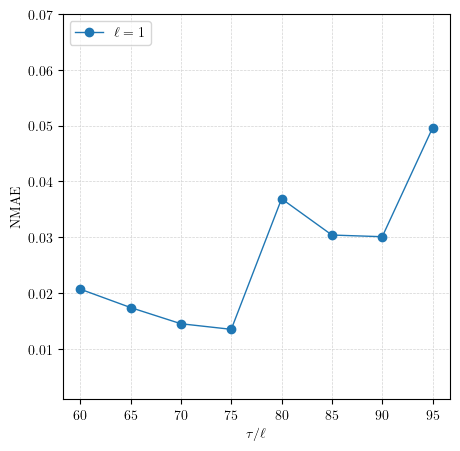

In [33]:
tau = np.linspace( 60, 95, 8 )
NMAE = np.array( [ 207, 174, 145, 135, 369, 304, 301, 496 ] ) / 10000

fig = plt.figure( figsize = ( 5, 5 ) )
ax1 = fig.add_subplot( 111 )
ax1.plot( tau, NMAE, linewidth = 1, c = "tab:blue", 
             marker = 'o', markerfacecolor = "tab:blue", label = r"$\ell = 1$" )
ax1.set_xlabel(r"$\tau / \ell$")
ax1.set_ylabel(r"$\rm NMAE$")
ax1.legend( loc = 'upper left' )
ax1.set_ylim( 0.001, 0.07 )
# ax1.set_box_aspect( 1 )
ax1.grid( color = 'lightgrey', linestyle = '--', linewidth = 0.5 )

plt.savefig( './NMAEvsTau_DualCG_M100.eps', format = 'eps', bbox_inches = 'tight' )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


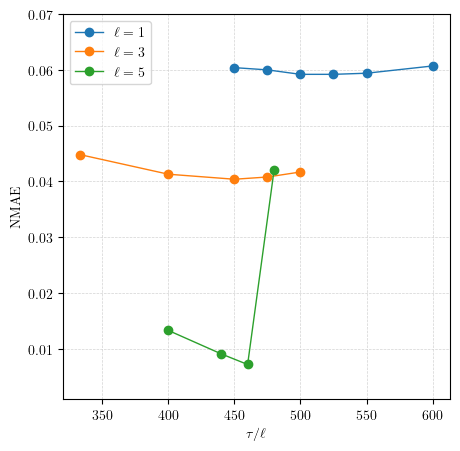

In [34]:
fig = plt.figure( figsize = ( 5, 5 ) )
ax1 = fig.add_subplot( 111 )

ell = 1
tau = np.array( [ 450, 475, 500, 525, 550, 600] ) / ell
NMAE = np.array( [ 604, 600, 592, 592, 594, 607 ] ) / 10000
ax1.plot( tau, NMAE, linewidth = 1, c = "tab:blue", 
             marker = 'o', markerfacecolor = "tab:blue", label = r"$\ell = 1$" )

ell = 3
tau = np.array( [ 1, 1.2, 1.35, 1.425, 1.5 ] ) * 1000 / ell
NMAE = np.array( [ 448, 413, 404, 408, 417 ] ) / 10000
ax1.plot( tau, NMAE, linewidth = 1, c = "tab:orange", 
             marker = 'o', markerfacecolor = "tab:orange", label = r"$\ell = 3$" )

ell = 5
tau = np.array( [ 2, 2.2, 2.3, 2.4 ] ) * 1000 / ell
NMAE = np.array( [ 133, 91, 72, 420 ] ) / 10000
ax1.plot( tau, NMAE, linewidth = 1, c = "tab:green", 
             marker = 'o', markerfacecolor = "tab:green", label = r"$\ell = 5$" )


ax1.set_xlabel(r"$\tau / \ell$")
ax1.set_ylabel(r"$\rm NMAE$")
ax1.legend( loc = 'upper left' )
# ax1.set_yscale( "log" )
ax1.set_ylim( 0.001, 0.07 )
# ax1.set_box_aspect( 1 )
ax1.grid( color = 'lightgrey', linestyle = '--', linewidth = 0.5 )

plt.savefig( './NMAEvsTau_DualCG_M500.eps', format = 'eps', bbox_inches = 'tight' )